# TetraX testing: dispersion of a NiFe thin film in a field partially OOP

Testing if the KS model is correct for arbitrary theta angle

In [1]:
# import tetrax as tx
# from tetrax import geometries, Sample
import numpy as np

import matplotlib.pyplot as plt  # for plotting SWT output
import SpinWaveToolkit as SWT
import pandas as pd

# print("TetraX version:", tx.__version__) # TetraX version >=2.0.0 required
print("SWT version:", SWT.__version__)

SWT version: 1.1.1dev


### Quick SpinWaveToolkit calculation ###

In [3]:
mat = SWT.NiFe
# gamma 29.25 GHz/T as for pure iron

# Define the propagation geometry
d = 40e-9  # (m) layer thickness
Bext = 1500e-3  # (T) external magnetic field
theta = np.deg2rad(45)  # (rad) for in-plane magnetization
phi = np.pi/2  # (rad) for Damon-Eshbach geometry
k = np.linspace(0, 25e6, 200) + 1  # (rad/m) SW wavenumber range
# Note the +1 above used to avoid badly conditioned calculations at k=0
bc = 1 # boundary condition (1 - totally unpinned, 2 - totally pinned spins)
modes_ks = [0, 1, 2]  # number of PSSW modes to calculate

In [4]:
# results of relaxation based on the initial theta (Bext direction)
theta0d = {
    "0": 0.,
    "30": 49.345049620528606,
    "45": 61.371194643577184,
    "60": 71.58703131974322,
    "90": 90.,
}
beffd = {
    "0": 1.5-mat.Ms*SWT.MU0,
    "30": 1.4153111823593059,
    "45": 1.439183699983108,
    "60": 1.469431106584822,
    "90": 1.5,
}

SL: 0.49469035098399994 TetraX: 0.49469035098399994


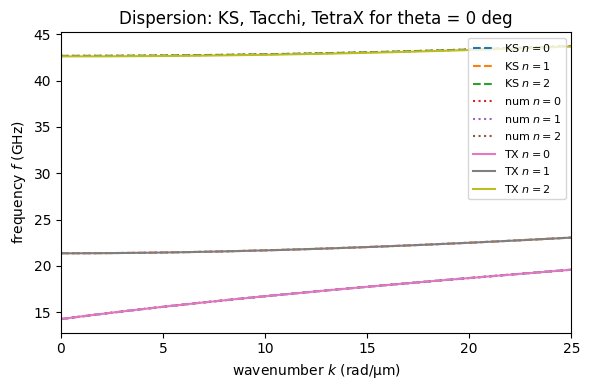

In [10]:
th_now = 0
th_str = str(th_now)
# --- Load CSV spectrum ---
df = pd.read_csv(f"M:/JupyterLab/Klima/TetraX_vs_SWT/fv_tests/NiFe_partiallyOOP_th{th_str}/eigen/spectrum_dataframe.csv")

# Assuming:
# col 1 = index
# col 2 = wavenumber
# col 4,5,6 = three modes
k_exp = df.iloc[:, 1].values   # 2nd column (Python indexing starts at 0)
modes_exp = df.iloc[:, 3:6].values  # 4th–6th column

fig, ax = plt.subplots(figsize=(6,4))

# Analytical
#for i in range(f_de.shape[0]):
#   ax.plot(k*1e-6, f_de[1], label=fr"KS $n={i}$", linestyle="--")

# Instantiate both layers
sl = SWT.SingleLayer(Bext, mat, d, k, np.deg2rad(theta0d[th_str]), phi, theta_H=np.deg2rad(th_now))
# sl = SWT.SingleLayer(Bext, mat, d, k, np.deg2rad(90), phi)  # fully IP
# sl = SWT.SingleLayer(Bext, mat, d, k, np.deg2rad(0), phi, theta_H=0, phi_H=0)  # fully OOP
f_ks = np.stack([sl.GetDispersion(j) / (2e9*np.pi) for j in modes_ks], axis=0)
# sln = SWT.SingleLayerNumeric(Bext, mat, d, k, np.deg2rad(90), phi, N=5)  # fully IP
# sln = SWT.SingleLayerNumeric(Bext-mat.Ms*SWT.MU0, mat, d, k, np.deg2rad(0), phi, N=5)  # fully OOP
sln = SWT.SingleLayerNumeric(beffd[th_str], mat, d, k, np.deg2rad(theta0d[th_str]), phi, N=5)
f_num = sln.GetDispersion()[0]/2e9/np.pi
print("SL:", sl.w0/mat.gamma, "TetraX:", beffd[th_str])

# Numeric
for i in modes_ks:
    ax.plot(k*1e-6, f_ks[i], label=fr"KS $n={i}$", linestyle="--")
for i in modes_ks:
    ax.plot(k*1e-6, f_num[i], label=fr"num $n={i}$", linestyle=":")

#TetraX spectrum (CSV)
for i in range(modes_exp.shape[1]):
   ax.plot(k_exp*1e-6, modes_exp[:, i] / (1e9), "-", label=f"TX $n={i}$", markersize=3)

# Labels and legend
ax.set_xlabel(r"wavenumber $k$ (rad/µm)")
ax.set_ylabel(r"frequency $f$ (GHz)")
ax.legend(fontsize=8, loc="best")
ax.set_title(f"Dispersion: KS, Tacchi, TetraX for theta = {th_now} deg")
ax.set_xlim(0, 25)   # <-- restrict to 0–25 rad/µm

plt.tight_layout()
plt.show()

In [2]:
help(SWT.SingleLayer)

Help on class SingleLayer in module SpinWaveToolkit.core._class_SingleLayer:

class SingleLayer(builtins.object)
 |  SingleLayer(
 |      Bext,
 |      material,
 |      d,
 |      kxi=array([1.00000000e-12, 1.25628141e+05, 2.51256281e+05, 3.76884422e+05,
 |         5.02512563e+05, 6.28140704e+05, 7.53768844e+05, 8.79396985e+05,
 |         1.00502513e+06, 1.13065327e+06, 1.25628141e+06, 1.38190955e+06,
 |         1.50753769e+06, 1.63316583e+06, 1.75879397e+06, 1.88442211e+06,
 |         2.01005025e+06, 2.13567839e+06, 2.26130653e+06, 2.38693467e+06,
 |         2.51256281e+06, 2.63819095e+06, 2.76381910e+06, 2.88944724e+06,
 |         3.01507538e+06, 3.14070352e+06, 3.26633166e+06, 3.39195980e+06,
 |         3.51758794e+06, 3.64321608e+06, 3.76884422e+06, 3.89447236e+06,
 |         4.02010050e+06, 4.14572864e+06, 4.27135678e+06, 4.39698492e+06,
 |         4.52261307e+06, 4.64824121e+06, 4.77386935e+06, 4.89949749e+06,
 |         5.02512563e+06, 5.15075377e+06, 5.27638191e+06, 5.40201005